# How to become a Spacebar Artist w/ Python

## Getting Started

A lot of people love music, but not a lot of people know how to start working with it. I come from a purely engineering background and have close to 0 understanding about music theory in general. Here, my goal is to cook up some documents that should serve as both an introduction to Python, but also an introduction to signals and machine learning applications - we will avoid math in this notebook and simply focus on applications.

To get started with this, you will need a few things. Ideally you are using either VSCode or Linux, so interacting with the terminal will be straightforward.
First, we need to ensure that you can work with JupyterNotebook from an IDE. To do this, we need to create a virtual environment. If you don't already, go into your terminal:
```
python3 -m venv PW
source PW/bin/activate
pip install librosa spleeter ipykernel
python -m ipykernel install --user --name=PW
sudo apt install ffmpeg
```

With this


Next, we need to make sure that all dependencies are installed, especially **Librosa** and **Spleeter**. To install these, you should run the following in the terminal:

```
pip install librosa spleeter matplotlib scipy numpy
```
Once those are done installing, we can start cooking. To test if there are any dependencies missing, just import them:

In [1]:
import librosa
import spleeter

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Finally, we should also import os to conveniently work with data in folders. For your convenience, we will format a lot of this for you, but it might be insightful to learn how to use the os library eventually.

In [3]:
import os

## Working With The Data

A brief explanation of the data you will receive. I manually labeled the files I am working with in a convenient way that 1) Holds Order Information and 2) Contains Relevant MetaInformation (mostly for readability and interpretability). Therefore the data might look something like: ```1_songName_author.mp3```

In [4]:
folder_path = 'Songs'  # Replace with the actual folder path

file_list = []
for file_name in os.listdir(folder_path):
    file_list.append(file_name)

file_list.sort()
print(file_list)

['1_Silence_Tiesto.mp3', '2_RayOfSolar_SwedishHouseMafia.mp3', '3_FeelYourGhost_Tiesto.mp3', '4_Strangers_DomDolla.mp3', '5_Hungover_JohnSummit.mp3', '6_Miracle_Adriatique.mp3', '7_OnMyKnees_RUFUSDUSOL.mp3', 'accompaniment', 'vocals']


You can see above that  a few things are done. We managed to figure out all the different song files and sort them by order to mix.

The next step is to get the components of the songs that we will be using. For DJ Mixing, the most useful parts of the songs to interact with are **Vocals** and **Accompaniment**. We will use spleeter to do all of the hard machine learning work to split the song into these 2 stems.

2024-03-29 03:35:56.580212: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


(19707264, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
INFO:tensorflow:Calling model_fn.


2024-03-29 03:35:59.023603: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-03-29 03:35:59.023617: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jibby2k1): /proc/driver/nvidia/version does not exist


INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from pretrained_models/2stems/model


2024-03-29 03:35:59.866742: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-29 03:35:59.896706: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'vocals': array([[2.7226275e-04, 3.7757630e-04],
       [1.9374878e-04, 2.7756955e-04],
       [2.2063241e-05, 9.8966644e-05],
       ...,
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00]], dtype=float32), 'accompaniment': array([[-4.1481815e-04, -4.2578109e-04],
       [-1.5455583e-04, -2.2460302e-04],
       [ 1.7090226e-04, -7.0430083e-06],
       ...,
       [ 0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00]], dtype=float32)}
(19707264, 2)
(19707264, 2)
INFO:spleeter:File Songs/vocals/1_Silence_Tiesto.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/1_Silence_Tiesto.mp3 written succesfully


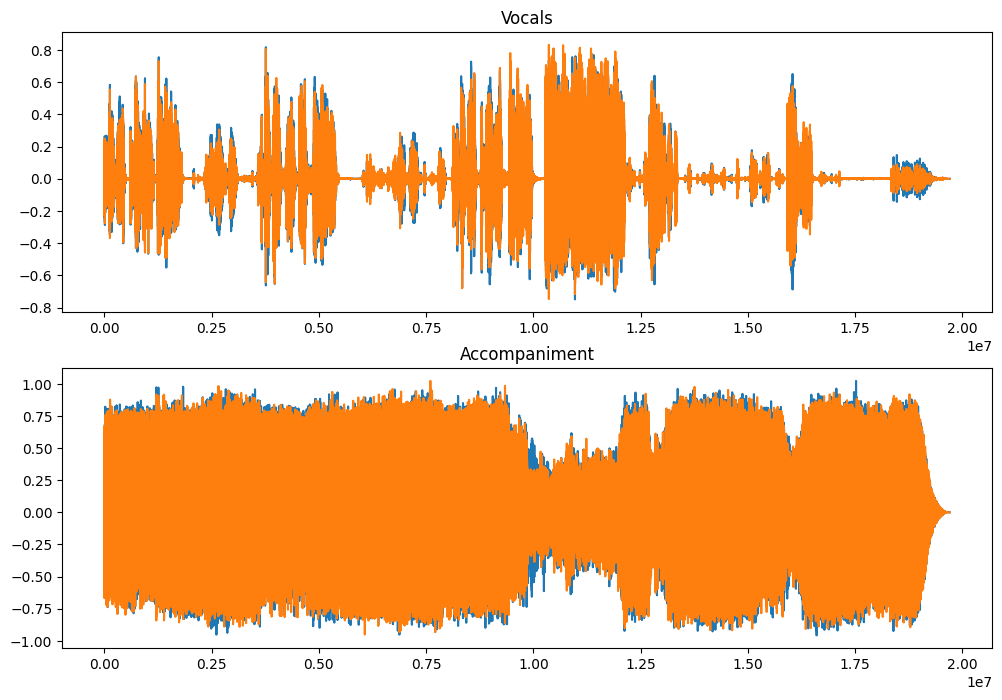

(9510261, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:t

Exception ignored in: <generator object Estimator.predict at 0x70308d3c7d80>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[-1.7150190e-02, -2.0556519e-02],
       [-1.7501205e-02, -2.1309625e-02],
       [-1.8103121e-02, -2.2216214e-02],
       ...,
       [ 1.5639795e-08, -4.3562707e-08],
       [ 1.3585899e-08, -4.2498719e-08],
       [ 2.3027530e-08, -4.6946603e-08]], dtype=float32), 'accompaniment': array([[ 1.8984270e-01,  1.9206546e-01],
       [ 2.8967348e-01,  2.8758031e-01],
       [ 3.1538129e-01,  3.0797255e-01],
       ...,
       [-2.7560162e-08,  4.6679855e-08],
       [-2.4826196e-08,  4.4478025e-08],
       [-1.1152121e-08,  4.3858261e-08]], dtype=float32)}
(9510261, 2)
(9510261, 2)
INFO:spleeter:File Songs/vocals/2_RayOfSolar_SwedishHouseMafia.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/2_RayOfSolar_SwedishHouseMafia.mp3 written succesfully


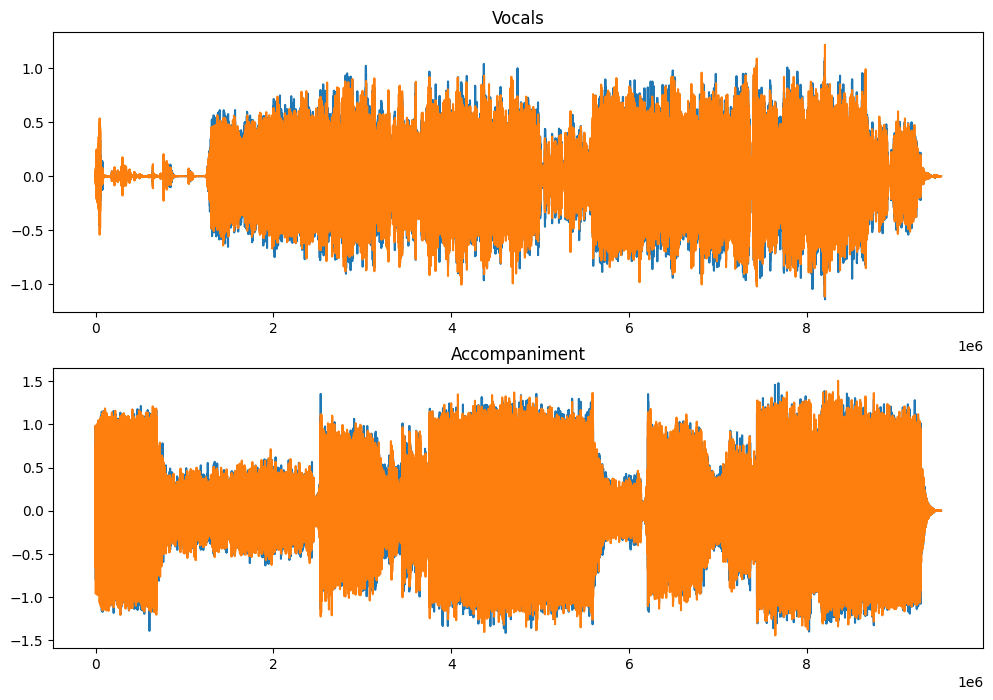

(12971224, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:

Exception ignored in: <generator object Estimator.predict at 0x702fdd2ed230>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[-1.0921726e-07, -1.8758533e-07],
       [-5.4429130e-08, -1.3184551e-07],
       [ 3.0388193e-08, -8.3616946e-08],
       ...,
       [ 1.1374456e-07,  4.1984862e-07],
       [ 2.8444032e-07,  3.0798810e-07],
       [ 3.3486299e-07, -2.5951576e-07]], dtype=float32), 'accompaniment': array([[ 1.4195365e-06,  1.3309696e-05],
       [-6.4215615e-06,  1.7384780e-05],
       [-8.4225667e-06,  2.4742229e-05],
       ...,
       [ 5.4949405e-06, -6.1656019e-06],
       [ 2.9491021e-06, -1.0566114e-06],
       [-1.6238864e-06,  1.5263080e-06]], dtype=float32)}
(12971224, 2)
(12971224, 2)
INFO:spleeter:File Songs/vocals/3_FeelYourGhost_Tiesto.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/3_FeelYourGhost_Tiesto.mp3 written succesfully


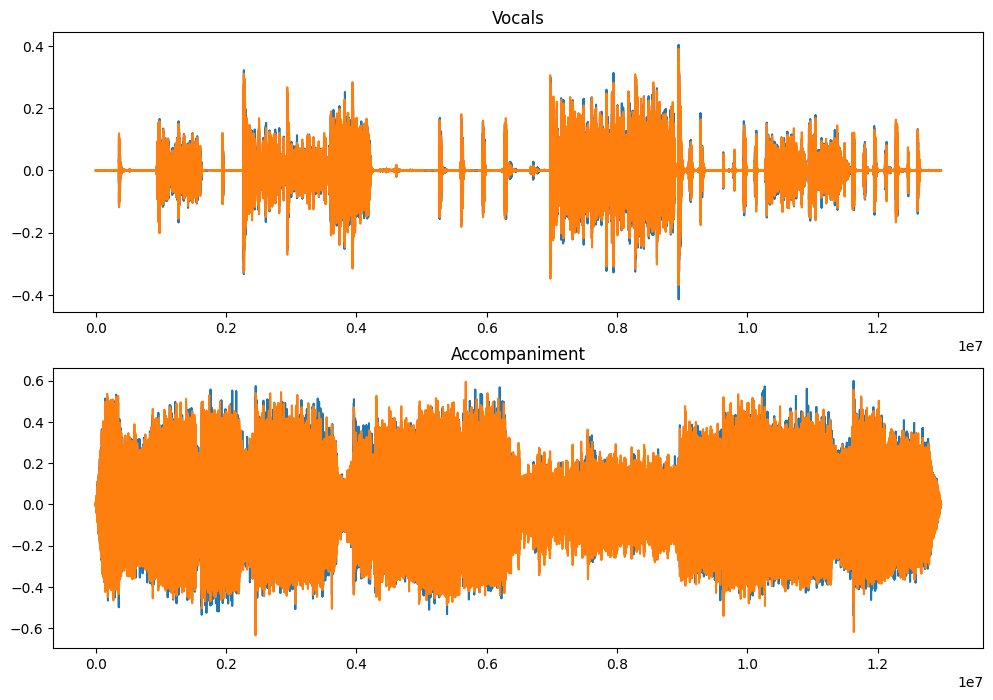

(9586904, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:t

Exception ignored in: <generator object Estimator.predict at 0x702f187a9b60>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[-2.1774486e-06, -1.3313208e-06],
       [-1.9004465e-06, -1.1571539e-06],
       [-2.0554692e-06, -2.2128679e-06],
       ...,
       [-8.7313606e-07, -1.4613419e-06],
       [-2.0204716e-06, -6.4764372e-06],
       [-3.6238089e-06, -6.8585227e-06]], dtype=float32), 'accompaniment': array([[ 1.21228077e-04,  1.19610879e-04],
       [ 1.13958224e-04,  1.20383527e-04],
       [ 3.69849004e-05,  3.74241354e-05],
       ...,
       [ 1.27430194e-05, -1.33274607e-05],
       [ 2.47438929e-05, -3.51582821e-05],
       [ 2.26400116e-05, -2.03368872e-05]], dtype=float32)}
(9586904, 2)
(9586904, 2)
INFO:spleeter:File Songs/vocals/4_Strangers_DomDolla.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/4_Strangers_DomDolla.mp3 written succesfully


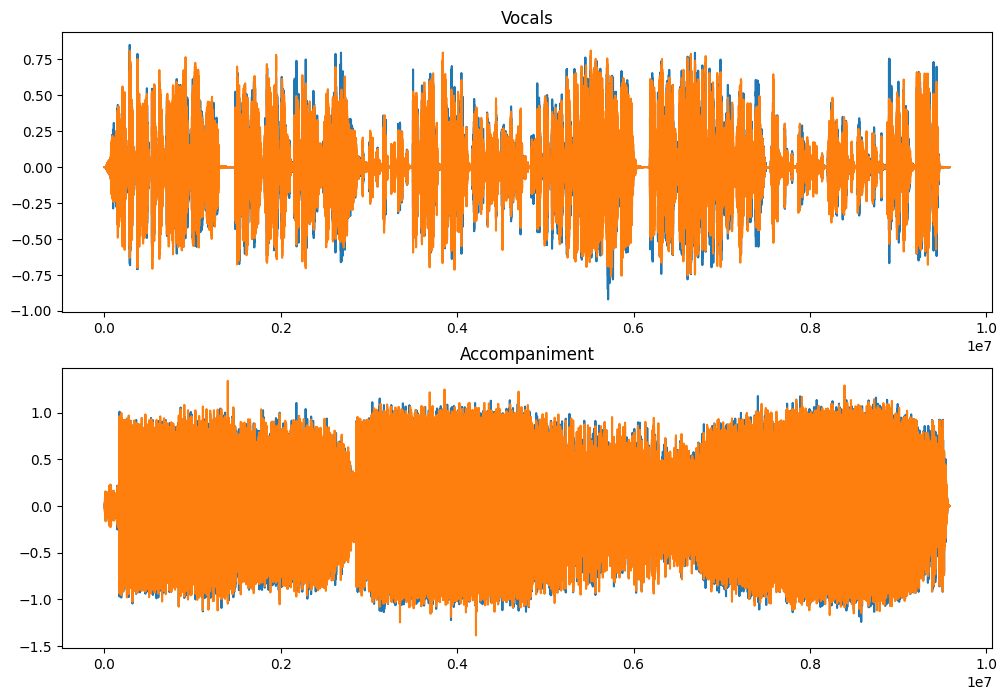

(9727941, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:t

Exception ignored in: <generator object Estimator.predict at 0x702f1bfd7920>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[-7.9233214e-06, -2.1297267e-06],
       [-3.1653876e-06, -1.2562461e-05],
       [ 1.8635744e-06, -2.0738720e-05],
       ...,
       [ 1.2326374e-08,  3.8862271e-07],
       [-1.8994615e-06,  2.9145913e-06],
       [-1.6479670e-06,  3.4582124e-06]], dtype=float32), 'accompaniment': array([[-1.4408190e-05, -6.8571302e-05],
       [-2.3759841e-05, -1.1071934e-04],
       [-4.3662334e-05, -1.2134532e-04],
       ...,
       [-1.3556030e-06, -3.6877384e-05],
       [-1.6843431e-05,  1.5105337e-05],
       [-1.8846371e-05,  3.3239492e-05]], dtype=float32)}
(9727941, 2)
(9727941, 2)
INFO:spleeter:File Songs/vocals/5_Hungover_JohnSummit.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/5_Hungover_JohnSummit.mp3 written succesfully


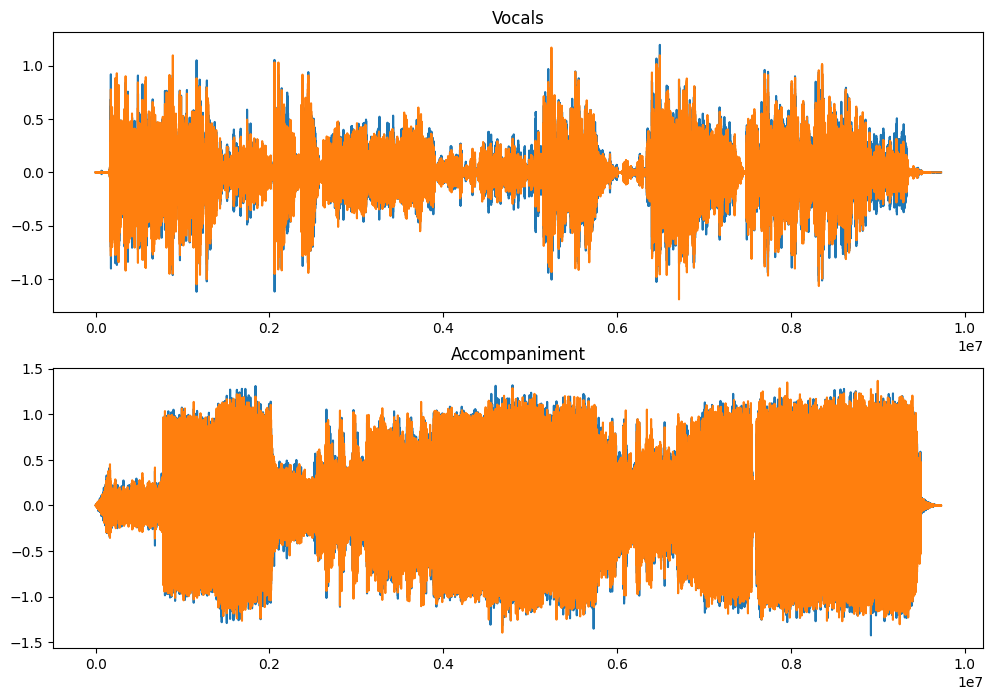

(13350867, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:

Exception ignored in: <generator object Estimator.predict at 0x702ef067b8b0>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[-1.5158494e-06,  1.9779827e-06],
       [-1.6910099e-06,  7.6658750e-07],
       [-9.7640714e-07, -1.6999944e-07],
       ...,
       [ 3.2154333e-07,  1.1451627e-06],
       [ 3.6980516e-08,  9.5805433e-07],
       [ 6.3281313e-08,  2.8304720e-07]], dtype=float32), 'accompaniment': array([[-1.1616642e-06, -7.0101839e-07],
       [ 4.9639493e-06,  3.8382200e-06],
       [ 9.8803985e-06,  3.8914532e-06],
       ...,
       [ 4.5177018e-07,  7.2733214e-06],
       [ 6.2519239e-06,  5.1986990e-06],
       [ 4.3800014e-06, -3.3125250e-06]], dtype=float32)}
(13350867, 2)
(13350867, 2)
INFO:spleeter:File Songs/vocals/6_Miracle_Adriatique.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/6_Miracle_Adriatique.mp3 written succesfully


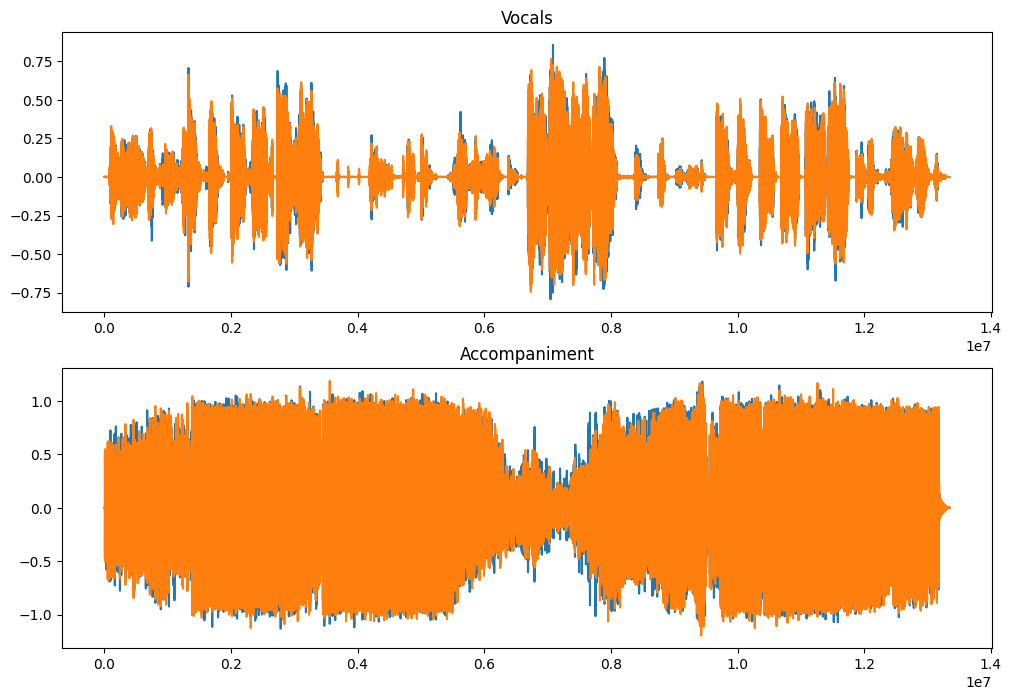

(11510150, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:

Exception ignored in: <generator object Estimator.predict at 0x70308d00f840>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[ 9.5013996e-07, -1.4848271e-07],
       [ 9.1702894e-08, -1.5933992e-06],
       [-1.1466379e-06, -4.4728779e-08],
       ...,
       [ 1.4327605e-06, -2.2419368e-05],
       [-2.8278273e-06, -2.9521796e-05],
       [-8.6920209e-06, -2.8919500e-05]], dtype=float32), 'accompaniment': array([[ 9.57096518e-07,  2.15840328e-06],
       [ 4.92611150e-07,  1.84783687e-07],
       [-6.87138424e-07, -1.85252316e-06],
       ...,
       [ 4.00957470e-06, -1.09571396e-04],
       [-6.21864892e-05,  1.33096168e-04],
       [-7.31511609e-05,  1.10800349e-04]], dtype=float32)}
(11510150, 2)
(11510150, 2)
INFO:spleeter:File Songs/vocals/7_OnMyKnees_RUFUSDUSOL.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/7_OnMyKnees_RUFUSDUSOL.mp3 written succesfully


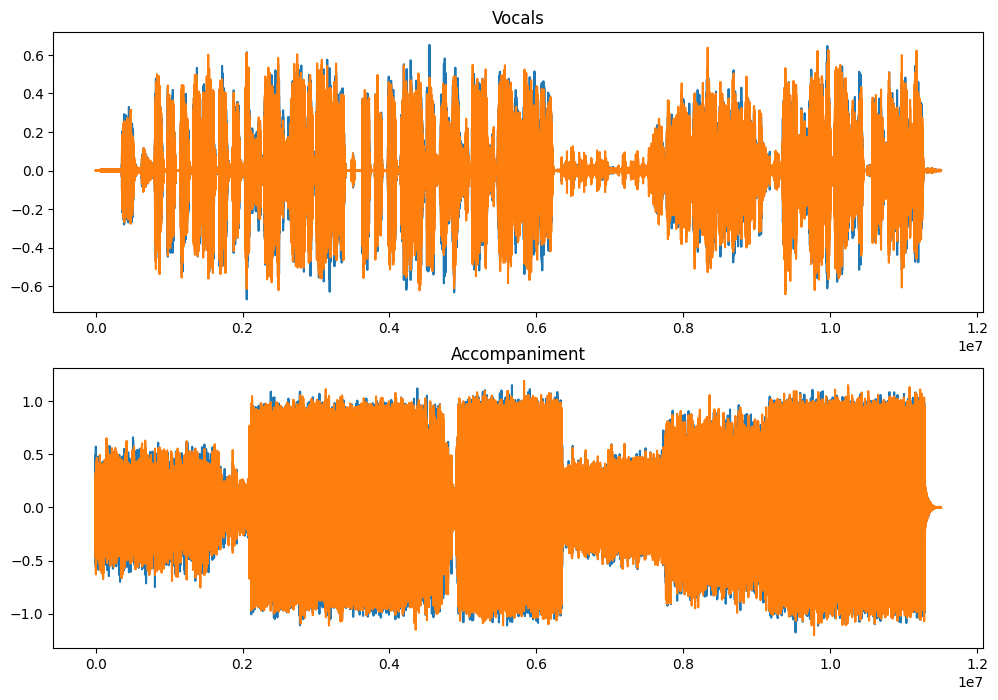

In [5]:
from spleeter.audio.adapter import AudioAdapter
from spleeter.separator import Separator
import gc

audio_adapter = AudioAdapter.default()

# Ensure the directories exist
os.makedirs('Songs/vocals', exist_ok=True)
os.makedirs('Songs/accompaniment', exist_ok=True)

for file_name in file_list:
    if not file_name.endswith('.mp3'):
        continue
    file_path = os.path.join(folder_path, file_name)
    waveform, fs = audio_adapter.load(file_path)
    print(waveform.shape)
    
    separator = Separator('spleeter:2stems')
    prediction = separator.separate(waveform)

    del waveform
    gc.collect()

    print(prediction)
    print(prediction['vocals'].shape)
    print(prediction['accompaniment'].shape)
    
    audio_adapter.save('Songs/vocals/' + file_name, prediction['vocals'], fs)
    audio_adapter.save('Songs/accompaniment/' + file_name, prediction['accompaniment'], fs)
    
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.title('Vocals')
    plt.plot(prediction['vocals'])
    plt.subplot(2, 1, 2)
    plt.title('Accompaniment')
    plt.plot(prediction['accompaniment'])
    plt.show()

    # Delete the variables and free up the memory
    del prediction
    gc.collect()

Cool! So now we have all the songs split into the different parts that most DJs address throughout their songs. The next part about being a DJ is "Signal Processing"

## Signal Processing

Mixing songs involves a few key elements, however the most important is definitely mixing songs together. To do this, DJ's typically play with a few knobs on their DJ Mixer board which will allow them to adjust Low Frequency Gain, High Frequency Gain, and overall Gain. One advantage to this approach is that we generated the stems of the songs, which would otherwise require very expensive software to do this generation for us. For the sake of the workshop, we won't exactly indulge on any DJing theory past this.